In [2]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from astropy.io import fits
import pylab


%matplotlib inline

//anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
hdulist1 = fits.open('testQimage1.fits')
hdulistPSF = fits.open('psf_178.168914766_-0.501176508188.fits')

In [4]:
hdulist1.info()
hdulistPSF.info()
#hdulist.close()

Filename: testQimage1.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      21   ()              
1    IMAGE       ImageHDU        34   (120, 120)   float32   
2                ImageHDU         5   ()              
3                ImageHDU         5   ()              
Filename: psf_178.168914766_-0.501176508188.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      16   (43, 43)     float64   


In [5]:
im1 = hdulist1[1].data
psf = hdulistPSF[0].data
size1 = im1.shape
sizePsf = psf.shape

(0, 40)

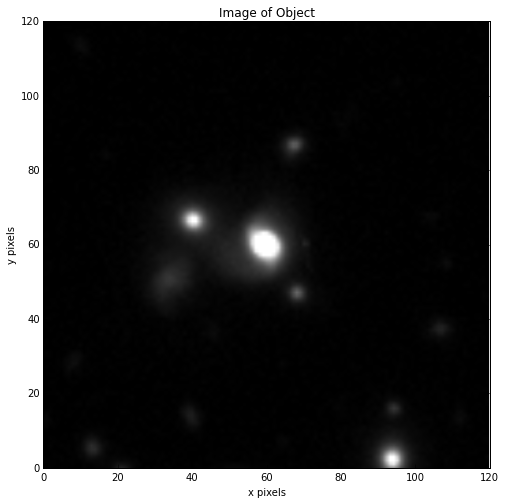

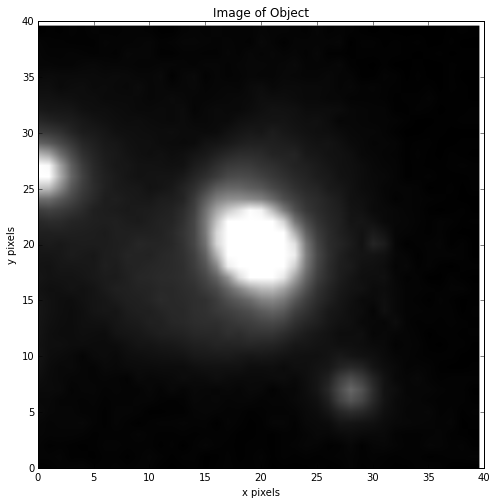

In [6]:
pylab.figure(figsize=(8,8))
#pylab.clf()
pylab.gray()
pylab.imshow(im1, vmin = 0, vmax = 10)

pylab.xlabel('x pixels')
pylab.ylabel('y pixels')
pylab.title("Image of Object")
pylab.ylim([0, size1[0]])
pylab.xlim([0, size1[1]])

smallerIm = im1[40:80, 40:80]
smallsize = smallerIm.shape



pylab.figure(figsize=(8,8))
pylab.imshow(smallerIm, vmin = 0, vmax = 10)

pylab.xlabel('x pixels')
pylab.ylabel('y pixels')
pylab.title("Image of Object")
pylab.ylim([0, smallsize[0]])
pylab.xlim([0, smallsize[1]])




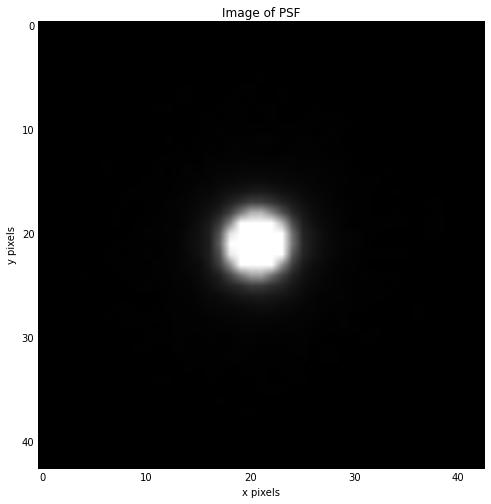

In [7]:
pylab.figure(figsize=(8,8))
#pylab.clf()

pylab.gray()
pylab.imshow(psf, vmin = 0, vmax = .01)

pylab.xlabel('x pixels')
pylab.ylabel('y pixels')
pylab.title("Image of PSF")



# graph zeropoint - 2.5log10(f_v / (0.168)^2) for surface brightness!


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in log10


(-0.01, 1.6800000000000002)

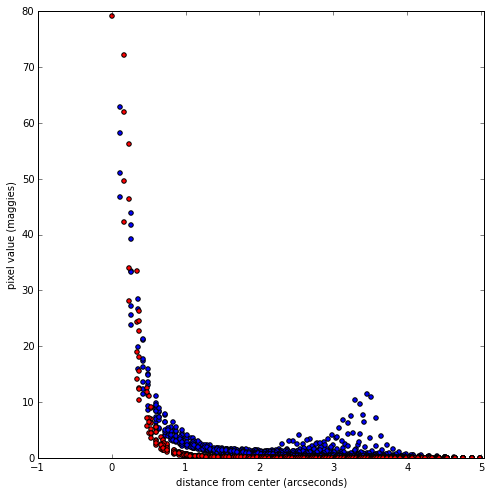

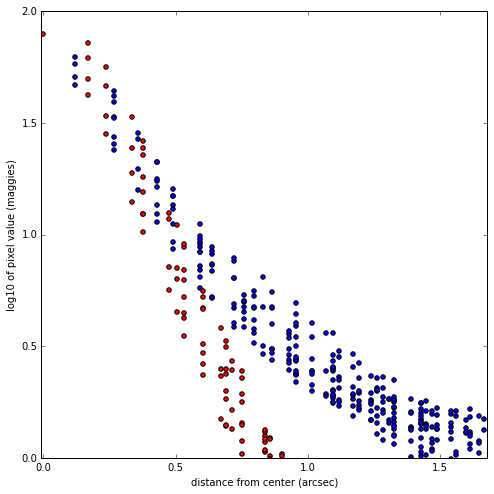

In [8]:
# calculate distance from center to any pixel
nx, ny = smallerIm.shape
x = np.arange(nx) - (nx-1)/2. 
y = np.arange(ny) - (ny-1)/2.
X, Y = np.meshgrid(x, y)
d = np.sqrt(X**2 + Y**2)


nxp, nyp = psf.shape
xp = np.arange(nxp) - (nxp-1)/2. 
yp = np.arange(nyp) - (nyp-1)/2.
Xp, Yp = np.meshgrid(xp, yp)
d_psf = np.sqrt(Xp**2 + Yp**2)


#print d.size
#print smallerIm.size



pylab.figure(figsize=(8,8))
plt.scatter(d * .168, smallerIm)    # changed to scatter from plot
plt.scatter(d_psf * .168, psf * 1e3, c = 'red')
pylab.xlabel('distance from center (arcseconds)')
pylab.ylabel('pixel value (maggies)')
pylab.ylim([0, 80])
pylab.xlim([-1, 30 * .168]) # 30 pixels

#print psf
#print smallerIm

pylab.figure(figsize=(8,8))
plt.scatter(d * .168, np.log10(smallerIm))    # changed to scatter from plot
plt.scatter(d_psf * .168, np.log10(psf * 1e3), c = 'red')
pylab.xlabel('distance from center (arcsec)')
pylab.ylabel('log10 of pixel value (maggies)')
pylab.ylim([0, 2])
pylab.xlim([-.01, 10 * .168]) # 10 pixels

#print smallerIm
#print d

27.0


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10


(0, 10)

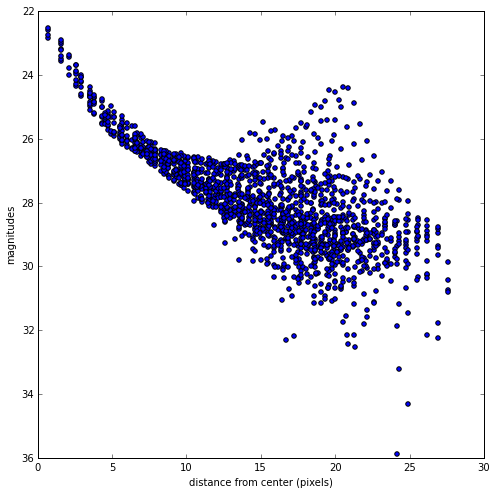

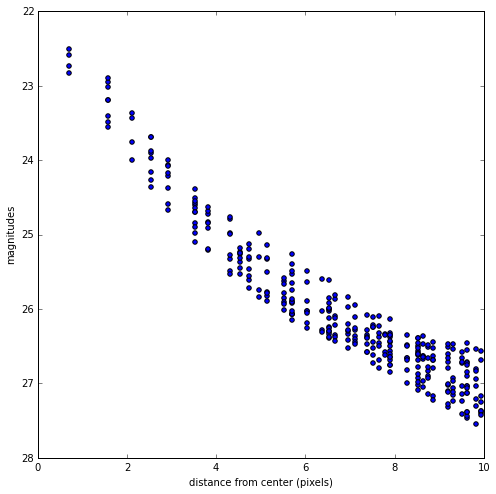

In [9]:
# convert from maggies to magnitudes
# 27.0 is average for HSC- find exact value for this image

# zero point calculation:
fluxmag0 = 63095734448.0194                   # given in header
zeropoint = 2.5*np.log10(fluxmag0)
print zeropoint


# magnitude calculation:
mags = zeropoint - 2.5*np.log10(smallerIm) 
#print mags


pylab.figure(figsize=(8,8))
plt.scatter(d, mags)    # changed to scatter from plot
pylab.xlabel('distance from center (pixels)')
pylab.ylabel('magnitudes')
pylab.ylim([36, 22])
pylab.xlim([0, 30]) # 30 pixels


pylab.figure(figsize=(8,8))
plt.scatter(d, mags)    # changed to scatter from plot
pylab.xlabel('distance from center (pixels)')
pylab.ylabel('magnitudes')
pylab.ylim([28, 22])
pylab.xlim([0, 10]) # 10 pixels


# .168 arcsec
# convert to flux, multiply by ^2, and then convert back to sq

27.0


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10


(0, 10)

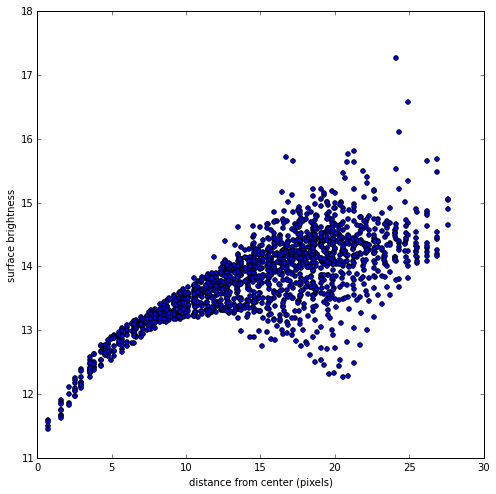

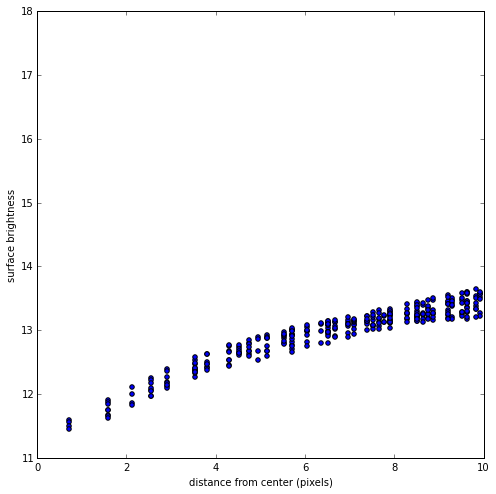

In [12]:
# convert from maggies to magnitudes
# 27.0 is average for HSC- find exact value for this image

# zero point calculation:
fluxmag0 = 63095734448.0194                   # given in header
zeropoint = 2.5*np.log10(fluxmag0)
print zeropoint


# magnitude calculation:
mags = zeropoint - 2.5*np.log10(smallerIm)   
#print mags

flux_perPixel = 10**(-2./5. * mags) * (3631. * 1E-23)
flux = flux_perPixel * (.168**2) # multiply - or divide- by area of each pixel?
# convert back to magnitudes

surface_mag = 1.08574 * np.log10(3631. * 1E-23 / (flux))

pylab.figure(figsize=(8,8))
plt.scatter(d, surface_mag)    # changed to scatter from plot
pylab.xlabel('distance from center (pixels)')
pylab.ylabel('surface brightness')
#pylab.ylim([17.5, 11])
pylab.xlim([0, 30]) # 30 pixels


pylab.figure(figsize=(8,8))
plt.scatter(d, surface_mag)    # changed to scatter from plot
pylab.xlabel('distance from center (pixels)')
pylab.ylabel('surface brightness')
#pylab.ylim([14, 11])
pylab.xlim([0, 10]) # 10 pixels


# .168 arcsec
# convert to flux, multiply by ^2, and then convert back to sq

[[  4.18632506e-32   6.59914476e-32   9.98422584e-32 ...,   4.97616440e-33
    7.10733198e-33   1.81952243e-32]
 [  9.60824750e-32   9.00680757e-32   1.14567171e-31 ...,   7.50423133e-32
    7.53954553e-32   1.08115258e-31]
 [  1.16077975e-31   5.22462218e-32   7.39869310e-32 ...,   7.75946231e-32
    9.80120960e-32   2.80480563e-32]
 ..., 
 [  1.38370884e-31   1.02009447e-31   9.79716413e-32 ...,   1.94787628e-32
    2.42801385e-32   2.92610930e-32]
 [  1.14928506e-31   8.41920616e-32   8.35412198e-32 ...,   6.26697827e-32
               nan   4.63415836e-33]
 [  1.74455631e-32   6.19080565e-32   2.60273639e-32 ...,   4.24313259e-32
    5.13271674e-32   2.44107947e-32]]


(0, 10)

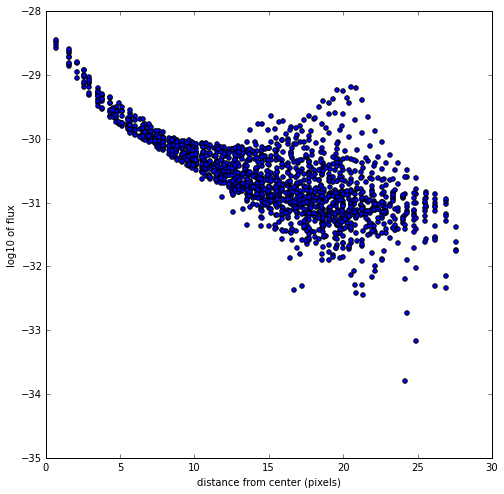

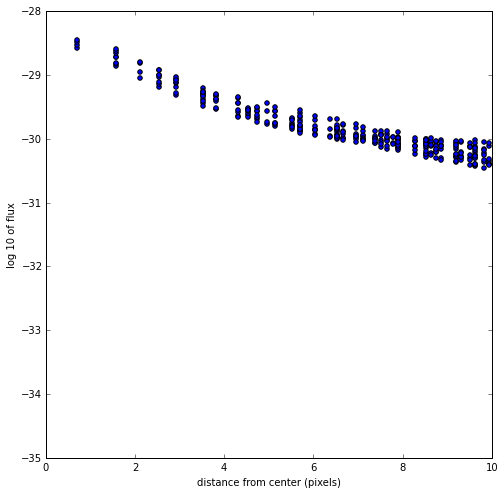

In [18]:
# mag = -5./2. * np.log10(flux / (3631. * 1E-23))
flux = 10**(-2./5. * mags) * (3631. * 1E-23)


print flux

pylab.figure(figsize=(8,8))
plt.scatter(d, np.log10(flux))    # changed to scatter from plot
pylab.xlabel('distance from center (pixels)')
pylab.ylabel('log10 of flux')
#pylab.ylim([-34, -28])
pylab.xlim([0, 30])


pylab.figure(figsize=(8,8))
plt.scatter(d, np.log10(flux))    # changed to scatter from plot
pylab.xlabel('distance from center (pixels)')
pylab.ylabel('log 10 of flux')
#pylab.ylim([-31, -28])
pylab.xlim([0, 10])


In [7]:
# plot y axis log
# normalization of psf doesn't matter - can change
# plot psf over above graph